## Tuesday

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline
from sklearn import datasets

In [2]:
churnData = pd.read_csv('DATA_Customer-Churn.csv')

In [3]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'] , errors='coerce')

In [5]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [6]:
mean_value = churnData['TotalCharges'].value_counts().mean()

In [7]:
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(mean_value)

In [8]:
churnData['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7043 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [11]:
TT_SPLIT = 0.2
RAND_STATE = 123  

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
churnData.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [33]:
X.isnull().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64

In [34]:
 a = churnData.loc[:, ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [35]:
a['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [36]:
binary_map = {'Yes': 1, 'No': 0}
a['Churn'] = a['Churn'].map(binary_map)

In [37]:
X = a.drop('Churn', axis=1)            #dataframe splitting
y = a['Churn']

log_model = LogisticRegression() 

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

,Error_metric,Train,Test
0,Accuracy,0.787185,0.798439
1,Precision,0.649284,0.694215
2,Recall,0.425889,0.444444


Confusion matrix for the train set
[[3800  343]
 [ 856  635]]


Confusion matrix for the test set
[[957  74]
 [210 168]]


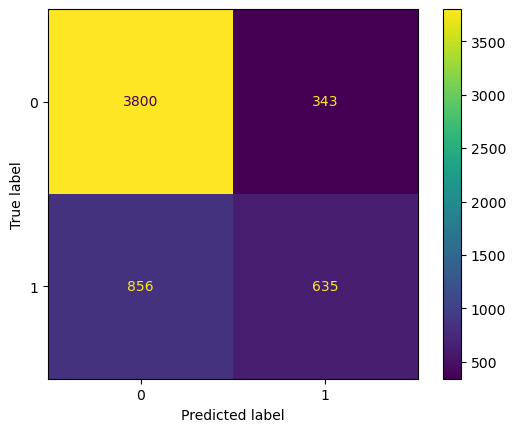

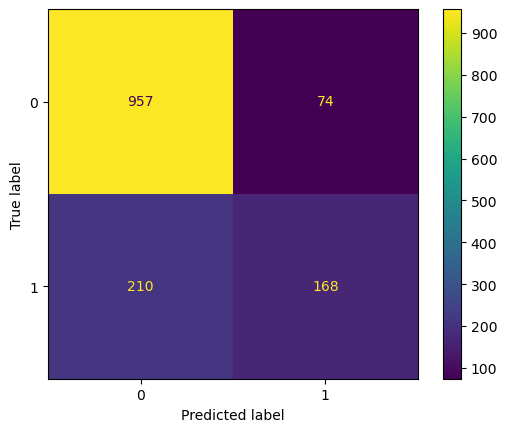

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')


print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')


In [40]:
for k in range(1, 16):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        accuracy = knn.score(X_test, y_test)
        print(f"k = {k}: accuracy = {accuracy:.3f}")

k = 1: accuracy = 0.710
k = 2: accuracy = 0.759
k = 3: accuracy = 0.741
k = 4: accuracy = 0.764
k = 5: accuracy = 0.770
k = 6: accuracy = 0.775
k = 7: accuracy = 0.776
k = 8: accuracy = 0.784
k = 9: accuracy = 0.784
k = 10: accuracy = 0.782
k = 11: accuracy = 0.780
k = 12: accuracy = 0.784
k = 13: accuracy = 0.782
k = 14: accuracy = 0.786
k = 15: accuracy = 0.786


In [41]:
def knn_classifier(k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    plot_confusion_matrix(knn, X_test, y_test)
    plt.title(f"k = {k}")
    return precision, recall
   
            

In [42]:
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [43]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

SyntaxError: 'return' outside function (1207723573.py, line 3)

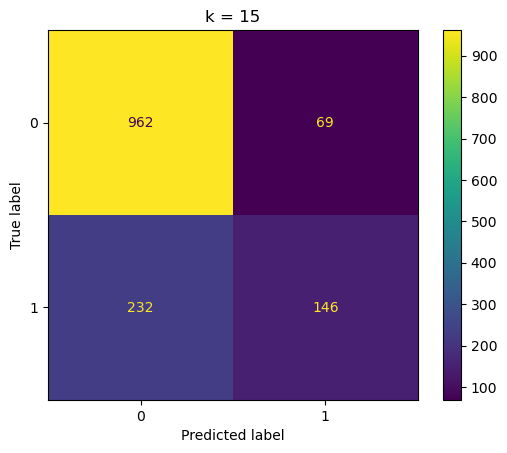

In [44]:
plot_confusion_matrix(knn, X_test, y_test)
plt.title(f"k = {k}")
return precision, recall

k = 1: precision = 0.458, recall = 0.437
k = 2: precision = 0.626, recall = 0.257
k = 3: precision = 0.522, recall = 0.407
k = 4: precision = 0.626, recall = 0.302
k = 5: precision = 0.603, recall = 0.418
k = 6: precision = 0.660, recall = 0.333
k = 7: precision = 0.627, recall = 0.413
k = 8: precision = 0.693, recall = 0.347
k = 9: precision = 0.658, recall = 0.407
k = 10: precision = 0.694, recall = 0.336
k = 11: precision = 0.649, recall = 0.392
k = 12: precision = 0.691, recall = 0.349
k = 13: precision = 0.664, recall = 0.381
k = 14: precision = 0.706, recall = 0.349
k = 15: precision = 0.679, recall = 0.386


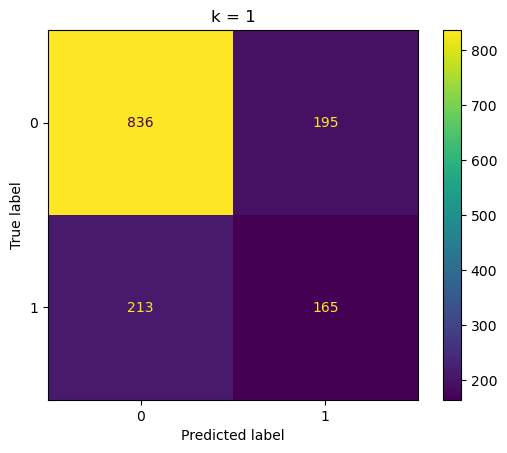

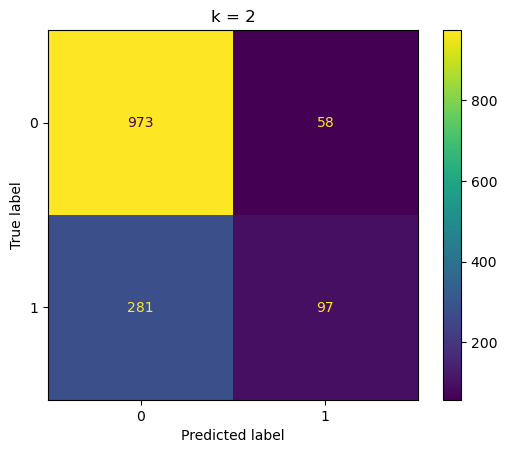

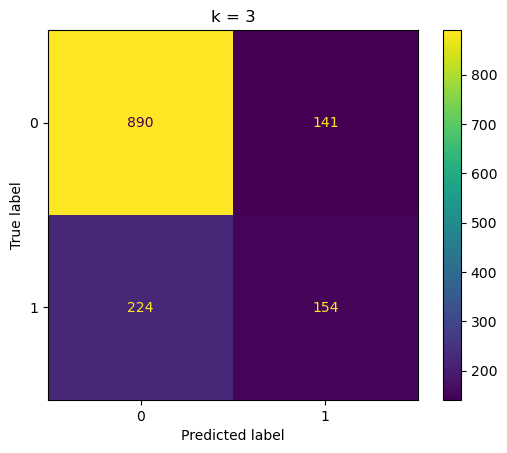

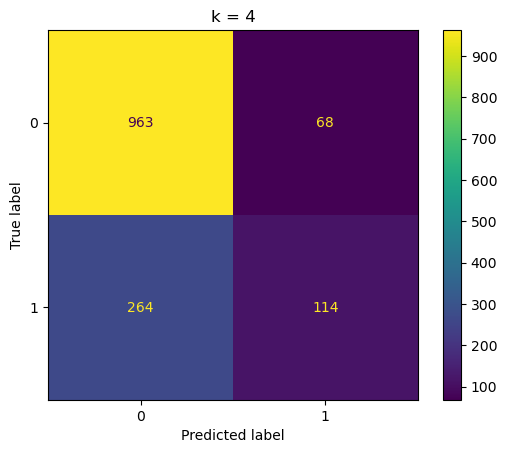

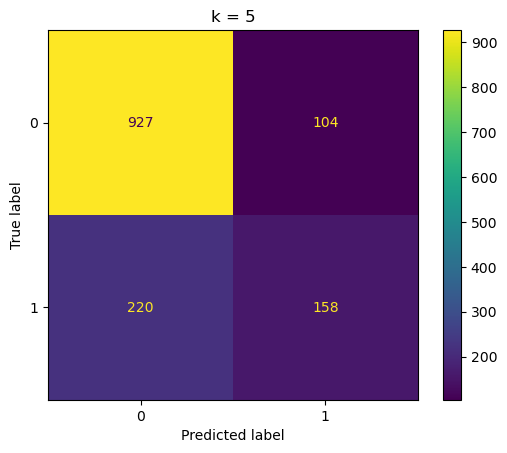

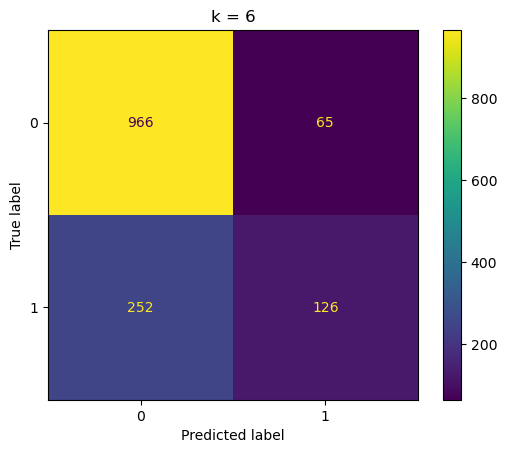

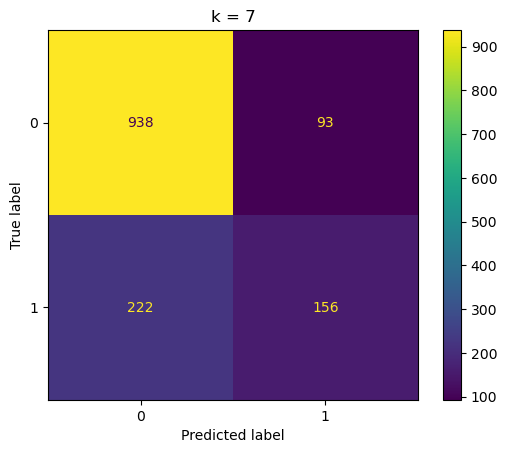

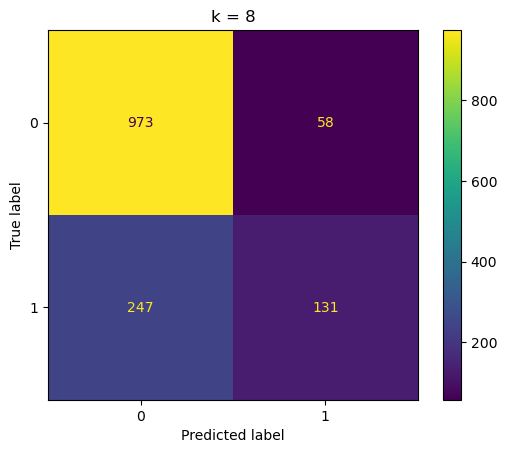

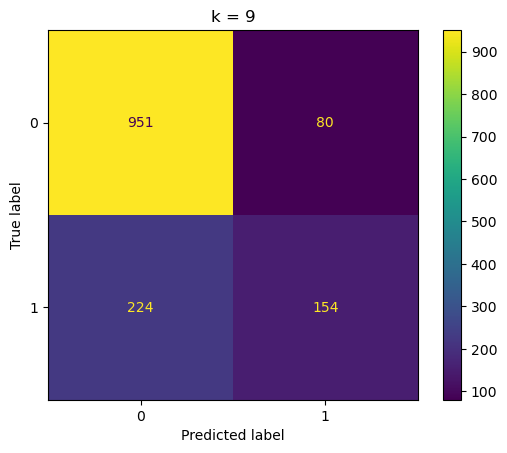

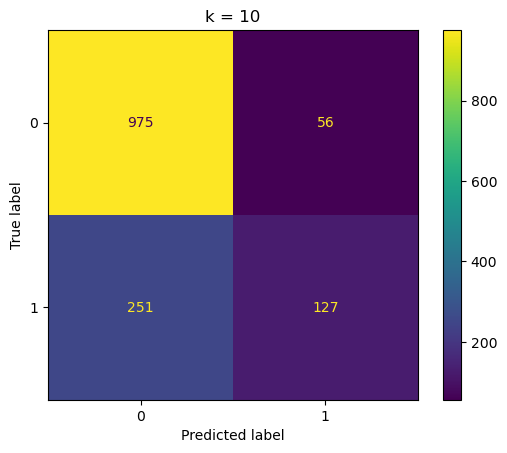

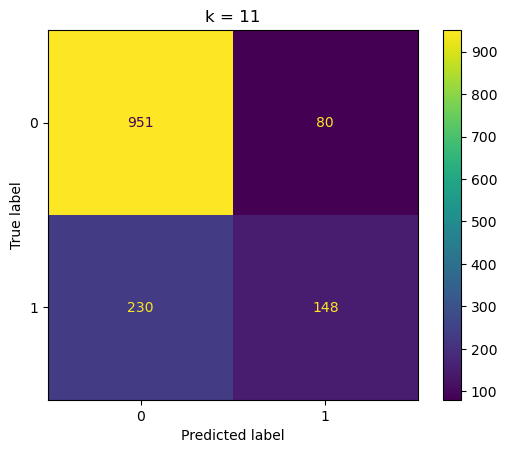

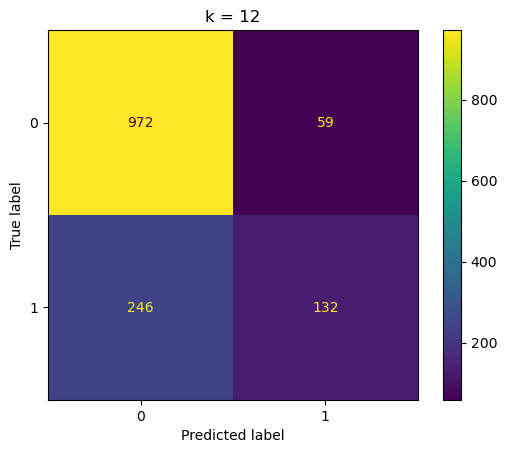

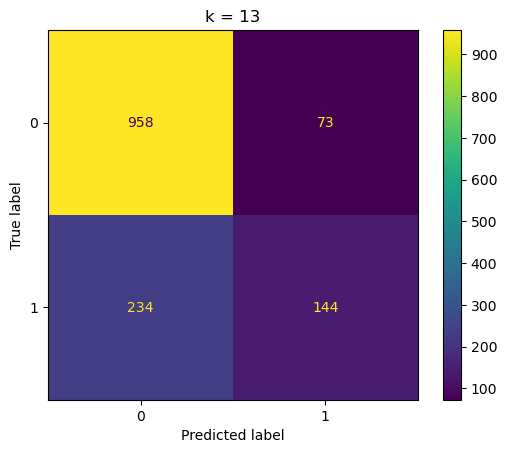

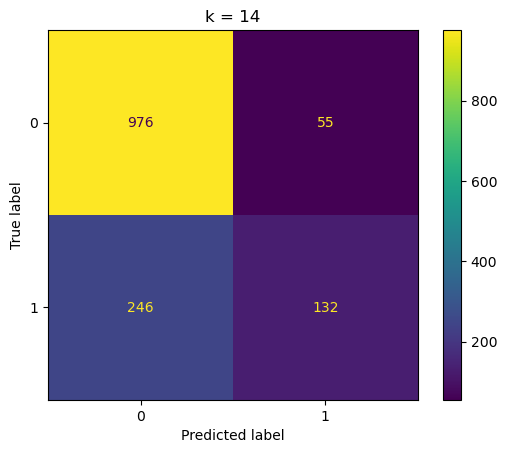

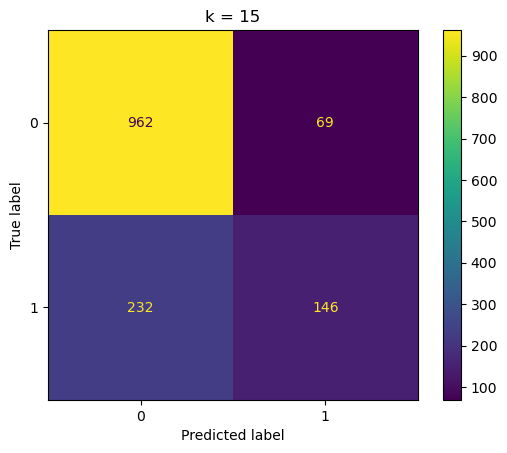

In [26]:
for k in range(1, 16):
    precision, recall = knn_classifier(k)
    print(f"k = {k}: precision = {precision:.3f}, recall = {recall:.3f}")
plt.show()

## Wednesday

#### Check the accuracy on the test data

In [74]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


,Error_metric,Train,Test
0,Accuracy,0.787018,0.778514
1,Precision,0.647904,0.662500
2,Recall,0.417116,0.370629


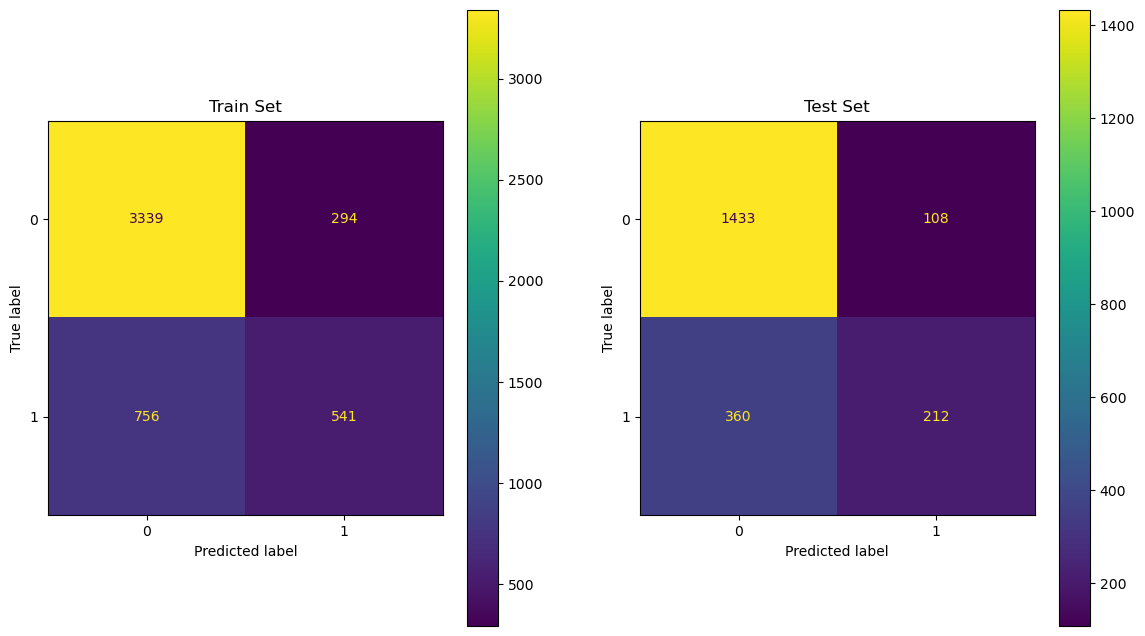

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

#### Features Importances

<BarContainer object of 4 artists>

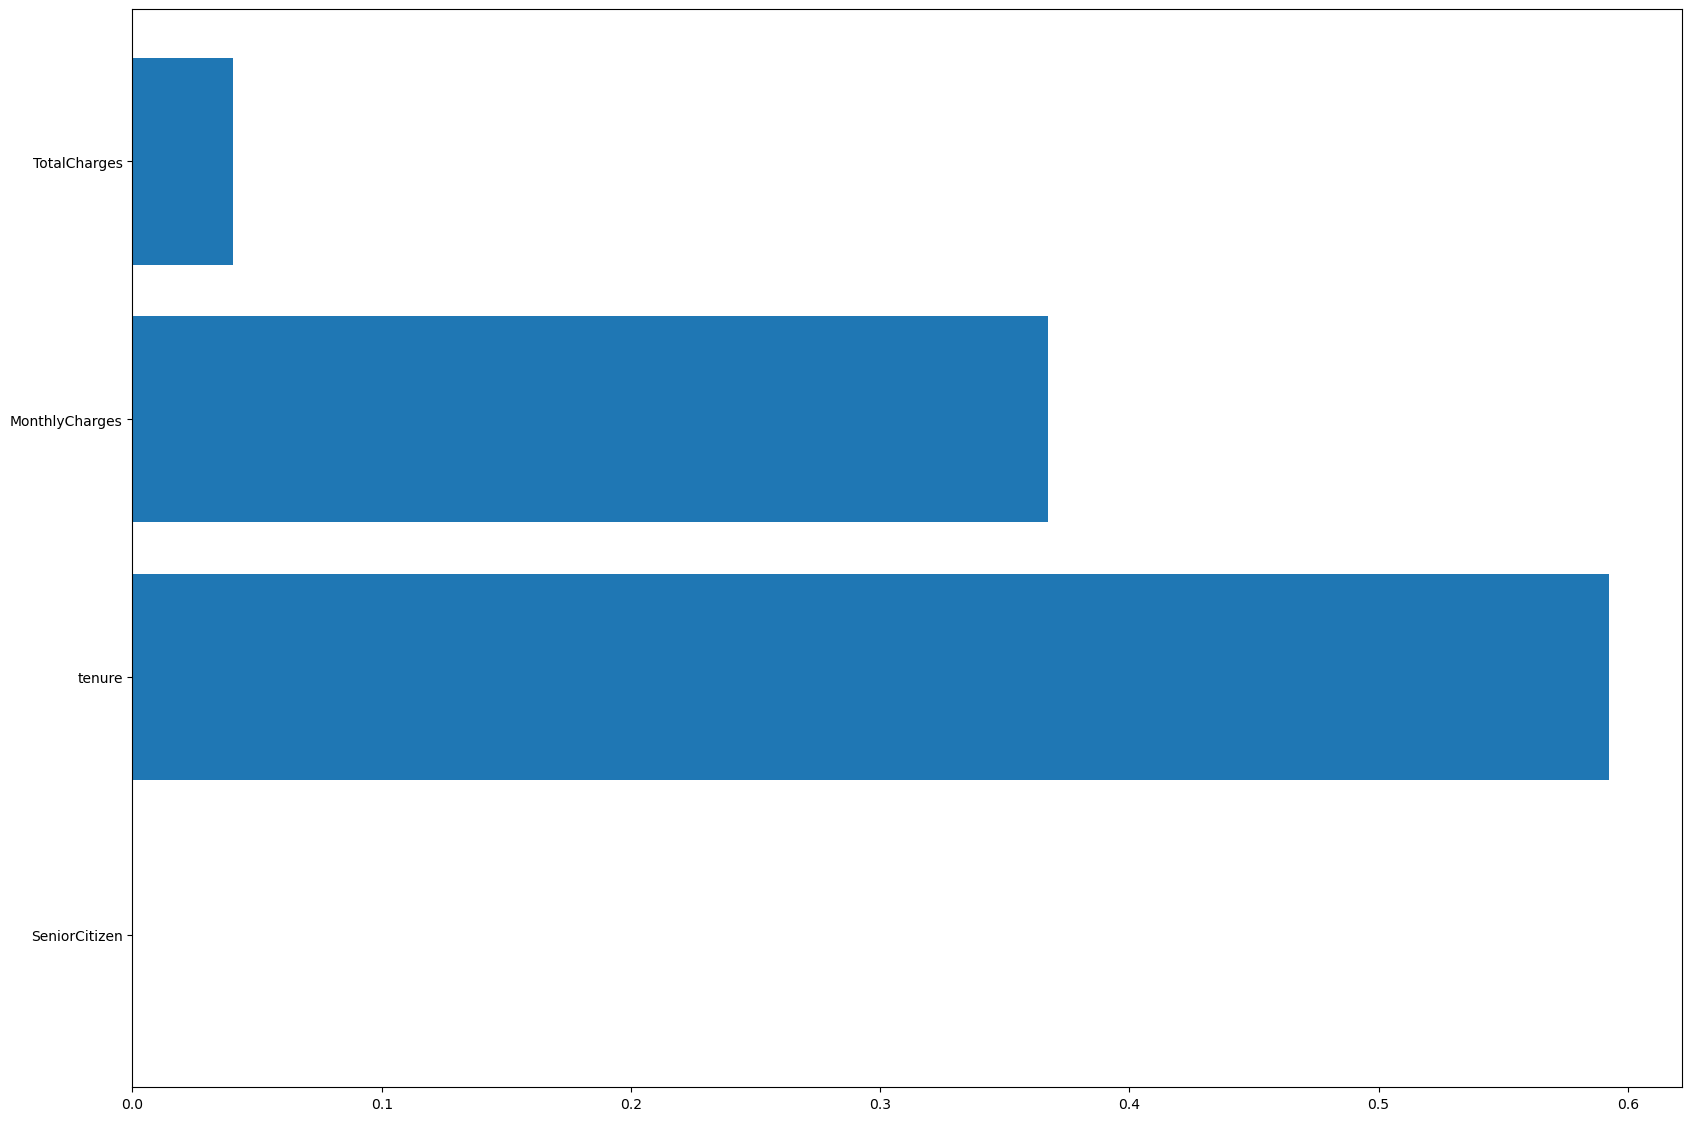

In [54]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

#### Fit a Decision Tree Classifier on the training data.

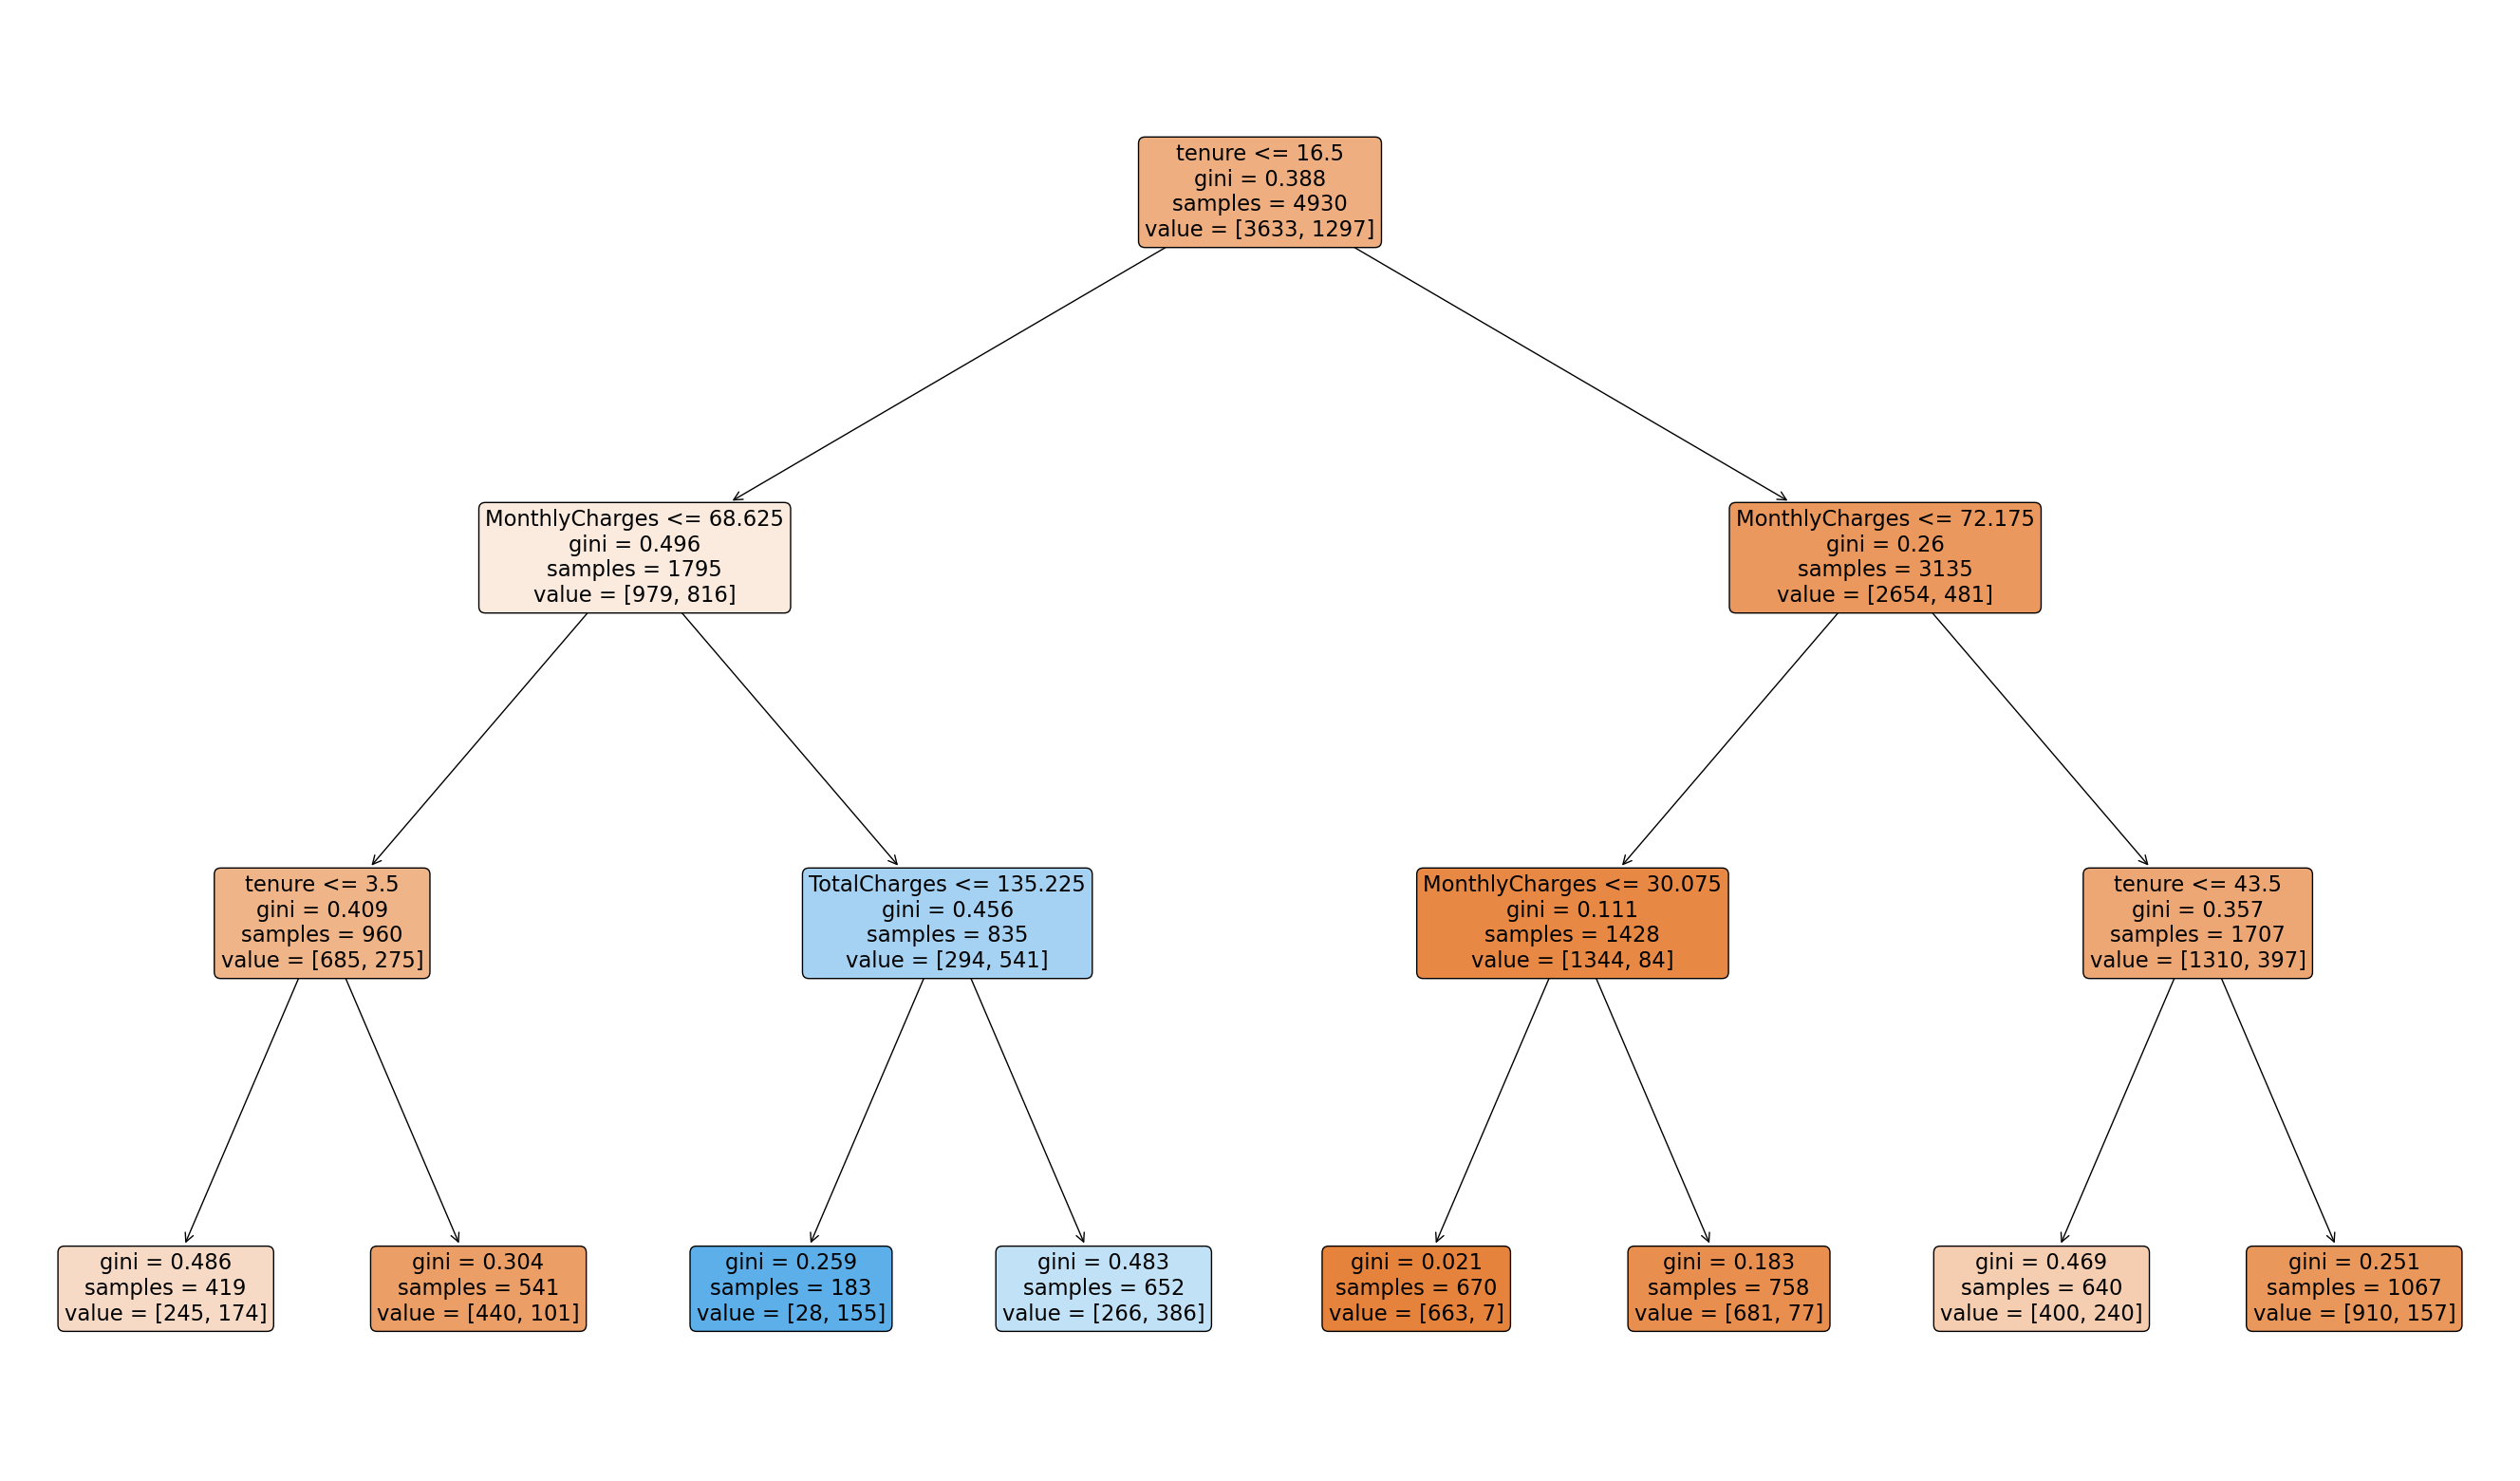

In [55]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

#### Data splitting and error metrics

In [60]:
model = DecisionTreeRegressor(max_depth=3)

model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [77]:
def performance_model(y_train, y_test, y_pred_train, y_pred_test):

    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'Predicted_value': y_pred_test})

    return performance, df_train, df_test

In [78]:
performance, _ ,_ = performance_model(y_train, y_test, y_pred_train, y_pred_test)
performance

,Error_metric,Train,Test
0,Mean error,0.00,0.01
1,Mean absolute error,0.29,0.30
2,Mean squared error,0.15,0.16
3,Root mean squared error,0.38,0.39
4,Mean absolute percentual error,inf,inf
5,R2,0.24,0.21


#### Decision tree

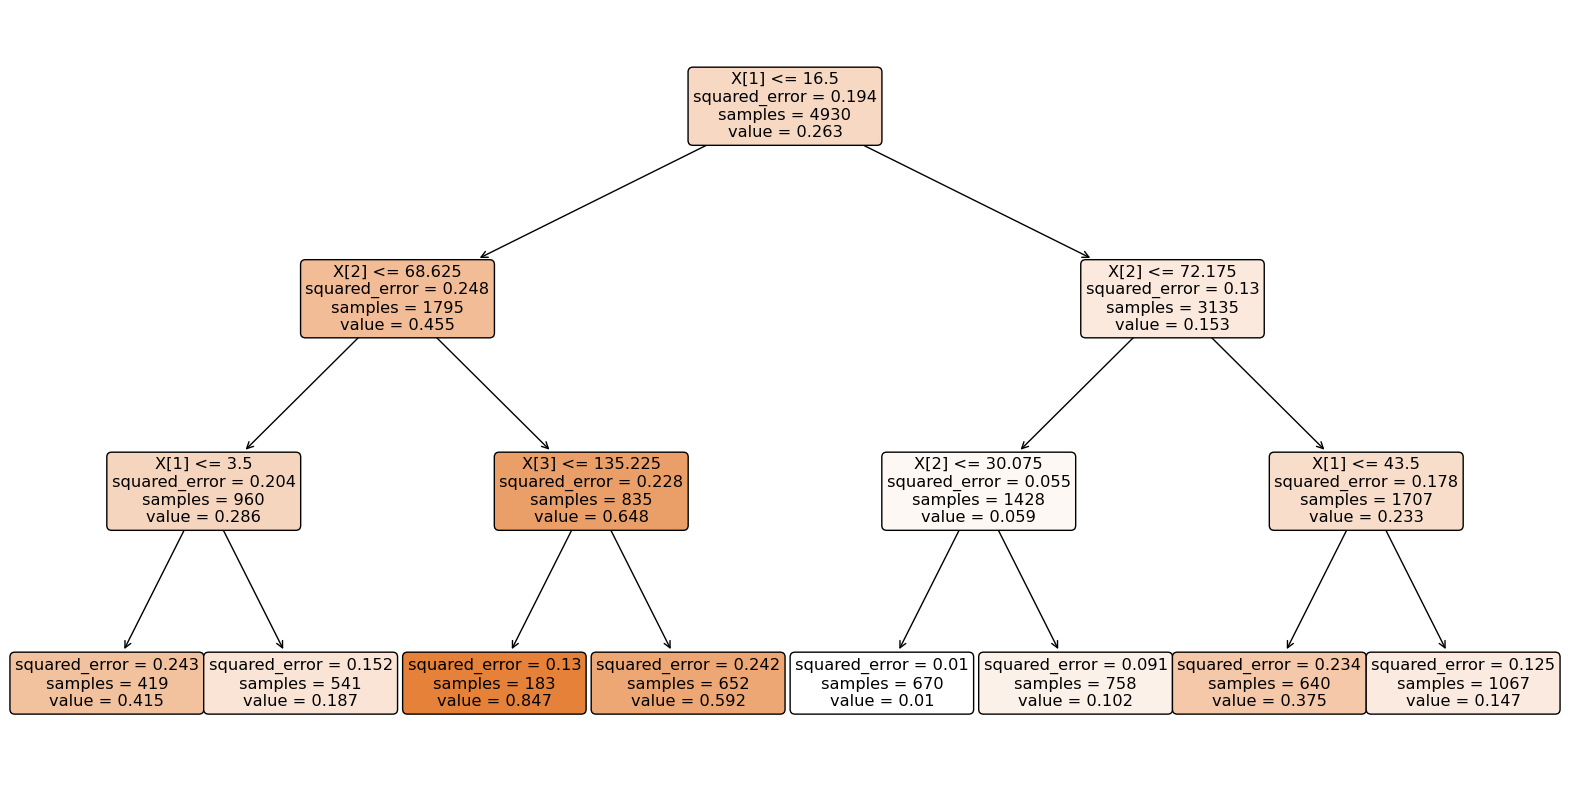

In [79]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(model,filled = True, rounded=True)
plt.show()